## DGL Beispiele

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sympy import *
init_printing()
%matplotlib notebook

In [2]:
y = Function('y')
t, t0 = symbols('t t_0', real = True)
yy = symbols('yy')

DGL mit endlichen maximalen Definitionsbereich

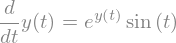

In [3]:
dgl1 = Eq(y(t).diff(t), exp(y(t))*sin(t))
dgl1

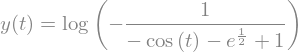

In [4]:
sol1 = dsolve(dgl1, ics={y(0):-S(1)/2})
sol1

Diese Lösung ist nur auf dem Intervall $[-\pi + \arccos(\exp(1/2)-1), \pi - \arccos(\exp(1/2)-1)]$ definiert

<IPython.core.display.Javascript object>


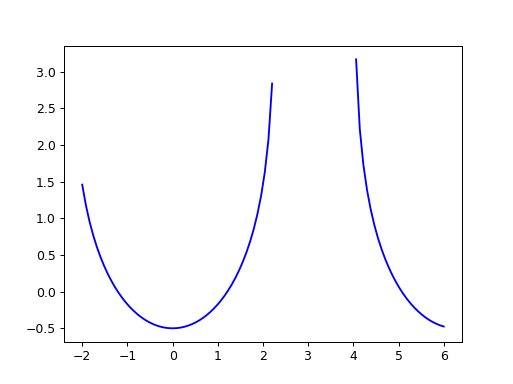

<lambdifygenerated-1>:2: RuntimeWarning: invalid value encountered in log
  return log(-1/(-cos(t) - exp(1/2) + 1))


In [5]:
tn = np.linspace(-2, 6, 100)
plt.figure()
plt.plot(tn, lambdify(t, sol1.rhs)(tn), 'b')
plt.show()
(pi-acos(exp(1/2)-1)).n()

AWP mit zwei Lösungen

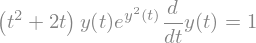

In [6]:
dgl2 = Eq( (t**2+2*t)*y(t)*exp(y(t)**2)*y(t).diff(t), 1)
dgl2

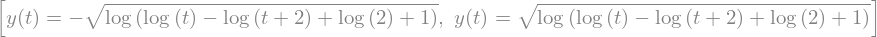

In [7]:
sol2 = dsolve(dgl2, ics={y(2):0})
sol2

Hier gibt es zwei Lösungen zum Anfangswert y(2)=0

<IPython.core.display.Javascript object>


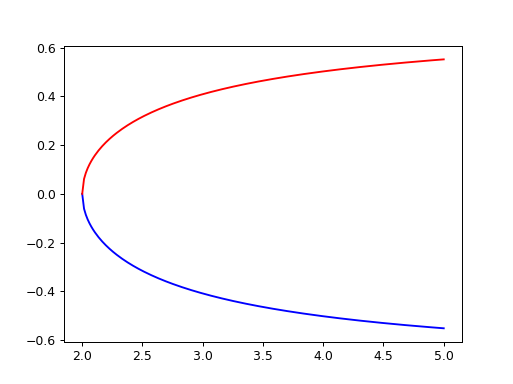

In [8]:
tn = np.linspace(2, 5, 200)
plt.figure()
plt.plot(tn, lambdify(t, sol2[0].rhs)(tn), 'b', tn, lambdify(t, sol2[1].rhs)(tn), 'r')

AWP mit unendlich vielen Lösungen

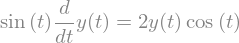

In [9]:
dgl3 = Eq( y(t).diff(t)*sin(t), 2*y(t)*cos(t))
dgl3

In [10]:
sol3 = dsolve(dgl3) 
sol3

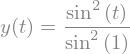

In [11]:
sol3aw = dsolve(dgl3, ics={y(1):1}) 
sol3aw

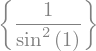

In [12]:
solveset(Eq(sol3.rhs.subs(t, 1), 1), S('C1'))

Da y(0) = 0 unabhängig von C1 gilt, gibt es unendlich viele Lösungen

<IPython.core.display.Javascript object>


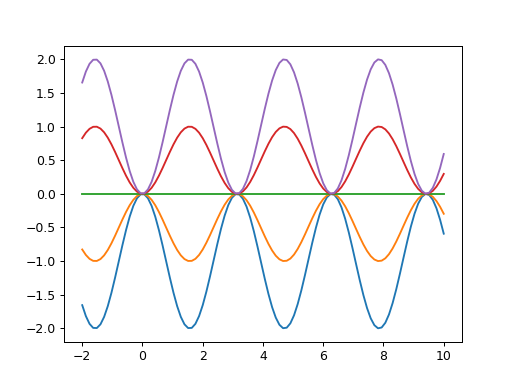

In [13]:
tn = np.linspace(-2, 10, 100)
plt.figure()
for c1 in [-2, -1, 1e-10, 1, 2]:
    plt.plot(tn, lambdify(t, sol3.rhs.subs(S('C1'), c1))(tn))

## Daten exportieren und importieren

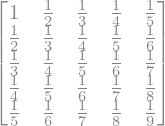

In [14]:
H  = Matrix(5,5,[Rational(1,j+i+1) for i in range(5) for j in range(5)])
H

In [15]:
str(H)

'Matrix([[1, 1/2, 1/3, 1/4, 1/5], [1/2, 1/3, 1/4, 1/5, 1/6], [1/3, 1/4, 1/5, 1/6, 1/7], [1/4, 1/5, 1/6, 1/7, 1/8], [1/5, 1/6, 1/7, 1/8, 1/9]])'

In [16]:
srepr(H) # erzeugt ausführbaren Pythoncode

'MutableDenseMatrix([[Integer(1), Rational(1, 2), Rational(1, 3), Rational(1, 4), Rational(1, 5)], [Rational(1, 2), Rational(1, 3), Rational(1, 4), Rational(1, 5), Rational(1, 6)], [Rational(1, 3), Rational(1, 4), Rational(1, 5), Rational(1, 6), Rational(1, 7)], [Rational(1, 4), Rational(1, 5), Rational(1, 6), Rational(1, 7), Rational(1, 8)], [Rational(1, 5), Rational(1, 6), Rational(1, 7), Rational(1, 8), Rational(1, 9)]])'

In [17]:
with open('output.txt','w') as f:  # w: write
    f.write(srepr(H) + '\n')

In [18]:
%less output.txt

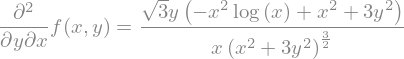

In [19]:
x, y = symbols('x y')
f = log(x)*sqrt(x**2/3+y**2)
df = f.diff(x, y).simplify()
f = Function('f')
lhs = f(x, y).diff(x, y)
eq = Eq(lhs, df)
eq

In [20]:
with open('diff.tex', 'w') as fh:
    fh.write(latex(eq) + '\n')

In [21]:
%less diff.tex 

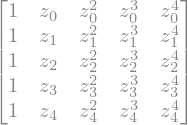

In [22]:
z = symbols('z:5')
V = Matrix(5, 5, [z[j]**i for j in range(5) for i in range(5)])
V

In [23]:
with open('output.txt', 'a') as fh:  # 'a' append / anhaengen
    fh.write(srepr(2*H) + '\n')
    fh.write(srepr(V))

In [24]:
with open('output.txt', 'r') as fh:  # read (default)
    HH = S(fh.readline())
    H2 = S(fh.readline())
    VV = S(fh.readline())

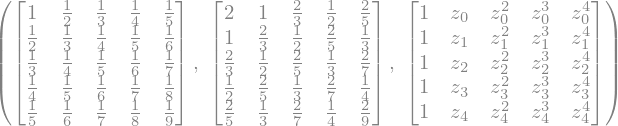

In [25]:
HH, H2, VV

In [26]:
%less output.txt 

In [27]:
# '%' IPython Magie (shell Befehl 'less')
# Aendere output.txt in Editor

In [28]:
with open('output.txt') as fh:  # read (default)
    for zeile in fh:
        print(zeile)
    else:
        print('Ende erreicht')

MutableDenseMatrix([[Integer(1), Rational(1, 2), Rational(1, 3), Rational(1, 4), Rational(1, 5)], [Rational(1, 2), Rational(1, 3), Rational(1, 4), Rational(1, 5), Rational(1, 6)], [Rational(1, 3), Rational(1, 4), Rational(1, 5), Rational(1, 6), Rational(1, 7)], [Rational(1, 4), Rational(1, 5), Rational(1, 6), Rational(1, 7), Rational(1, 8)], [Rational(1, 5), Rational(1, 6), Rational(1, 7), Rational(1, 8), Rational(1, 9)]])

MutableDenseMatrix([[Integer(2), Integer(1), Rational(2, 3), Rational(1, 2), Rational(2, 5)], [Integer(1), Rational(2, 3), Rational(1, 2), Rational(2, 5), Rational(1, 3)], [Rational(2, 3), Rational(1, 2), Rational(2, 5), Rational(1, 3), Rational(2, 7)], [Rational(1, 2), Rational(2, 5), Rational(1, 3), Rational(2, 7), Rational(1, 4)], [Rational(2, 5), Rational(1, 3), Rational(2, 7), Rational(1, 4), Rational(2, 9)]])

MutableDenseMatrix([[Integer(1), Symbol('z0'), Pow(Symbol('z0'), Integer(2)), Pow(Symbol('z0'), Integer(3)), Pow(Symbol('z0'), Integer(4))], [Integer(1)

In [29]:
%less output.txt